# 데이터 전처리
- 데이터 인코딩

In [24]:
from sklearn.datasets import load_iris, load_breast_cancer

from sklearn.tree        import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
# 대문자로 시작하면 class -> 객체 생성해야함, 소문자로 시작하면 함수

import pandas as pd
import numpy  as np

In [2]:
item_label = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
encoder = LabelEncoder()
encoder.fit(item_label)
digit_label = encoder.transform(item_label)
print('encoder', encoder)
print('encoder 결과', digit_label)
print("*"*50)
print('decoder 결과', encoder.inverse_transform([0, 1, 4, 5, 3, 3, 2, 2]))

encoder LabelEncoder()
encoder 결과 [0 1 4 5 3 3 2 2]
**************************************************
decoder 결과 ['TV' '냉장고' '전자렌지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


- One-Hot Encoding

In [3]:
from sklearn.preprocessing import  OneHotEncoder

item_label = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
encoder = LabelEncoder()
encoder.fit(item_label)
digit_label = encoder.transform(item_label)

print('type', type(digit_label))

# 2차원 데이터로 변환
digit_label = digit_label.reshape(-1,1)
print(digit_label.shape)

# One-Hot Encoding
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(digit_label)
one_hot_label   = one_hot_encoder.transform(digit_label)
print(one_hot_label.toarray())
print(one_hot_label.shape)

type <class 'numpy.ndarray'>
(8, 1)
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


- pandas get_dummies(df)

In [4]:
one_hot_df = pd.DataFrame({'item': ['TV', '냉장고', '전자렌지','컴퓨터','선풍기', '선풍기', '믹서', '믹서']})
one_hot_df

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [5]:
pd.get_dummies(one_hot_df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 결측값 처리

In [1]:
from io import StringIO
import pandas as pd
import numpy as np 

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data)
df


,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [2]:
# pandas isnull(), isna() 위치 확인
# sum()

In [3]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [4]:
df.isna().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

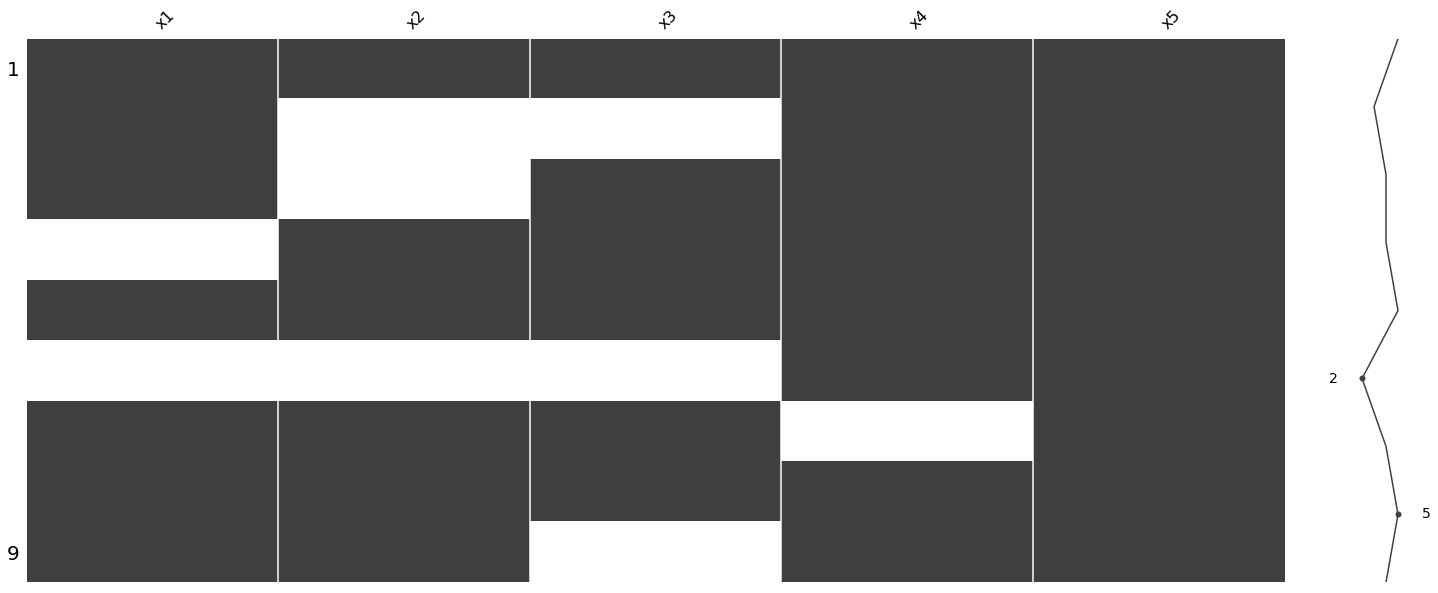

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno
# 결측 데이터를 시각화 함수
# 결측 데이터는 흰색, 그렇지 않은 데이터는 검은색

msno.matrix(df)
plt.show()

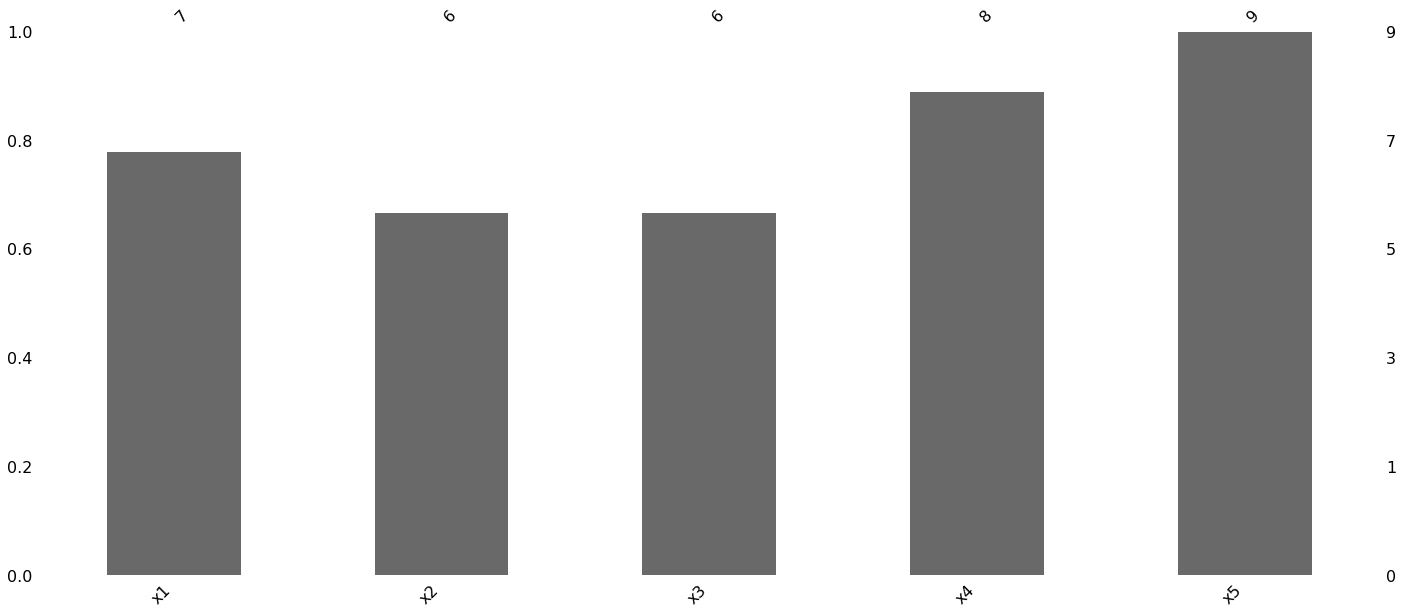

In [6]:
# 갈 열에 결측 데이터가 얼마나 존재하는지 시각화
msno.bar(df)
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# 타이타닉 생존자 데이터를 이용한 missingno 쓰임새 알아보기
titanic = sns.load_dataset('titanic')
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


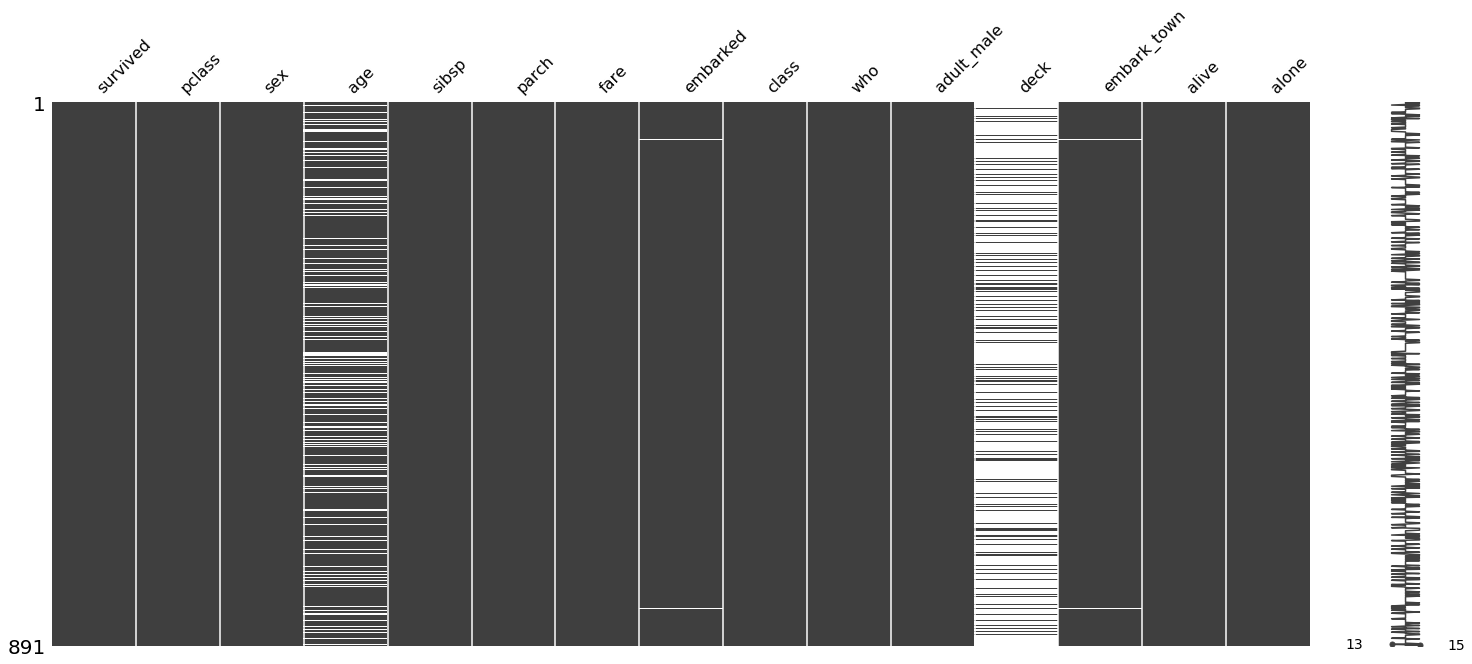

In [9]:
# missingno를 이용하여 타이타닉 데이터에서 age, deck, embarked, embark_town 열에 대한 결측 데이터 확인
msno.matrix(titanic)
plt.show()

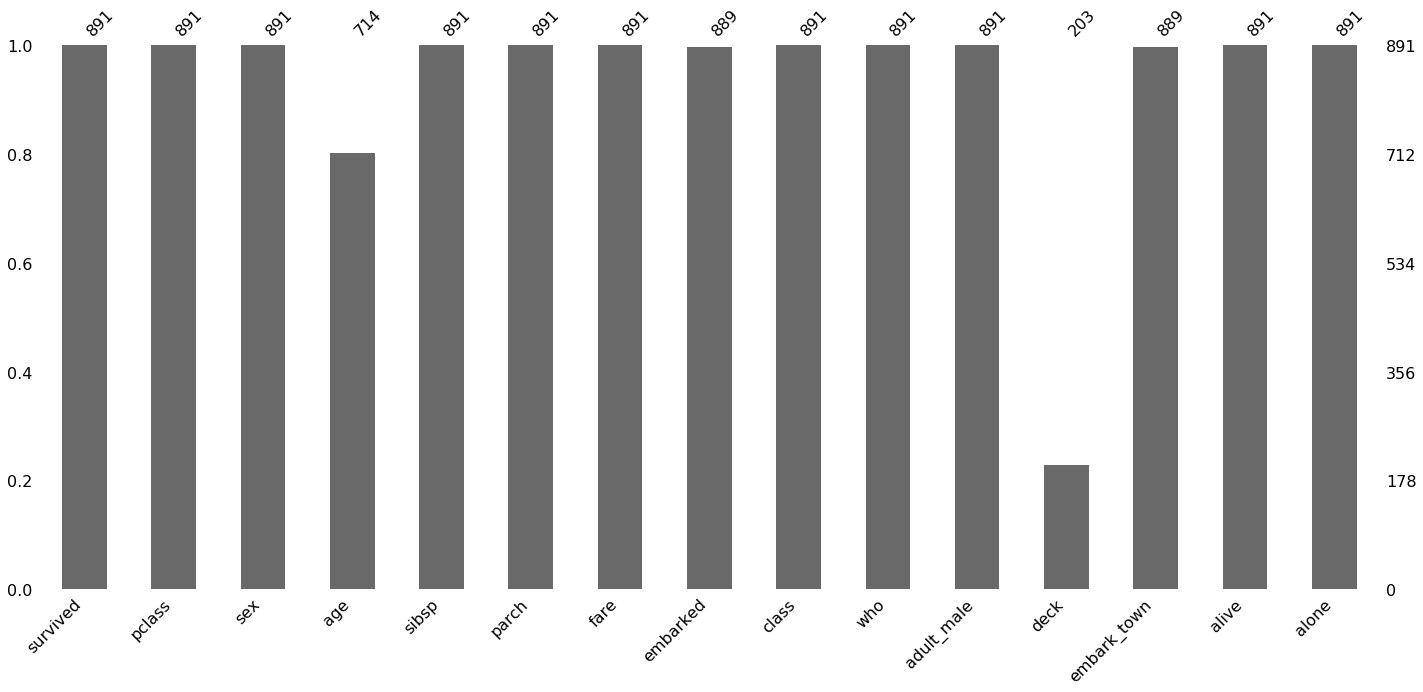

In [10]:
msno.bar(titanic)
plt.show()

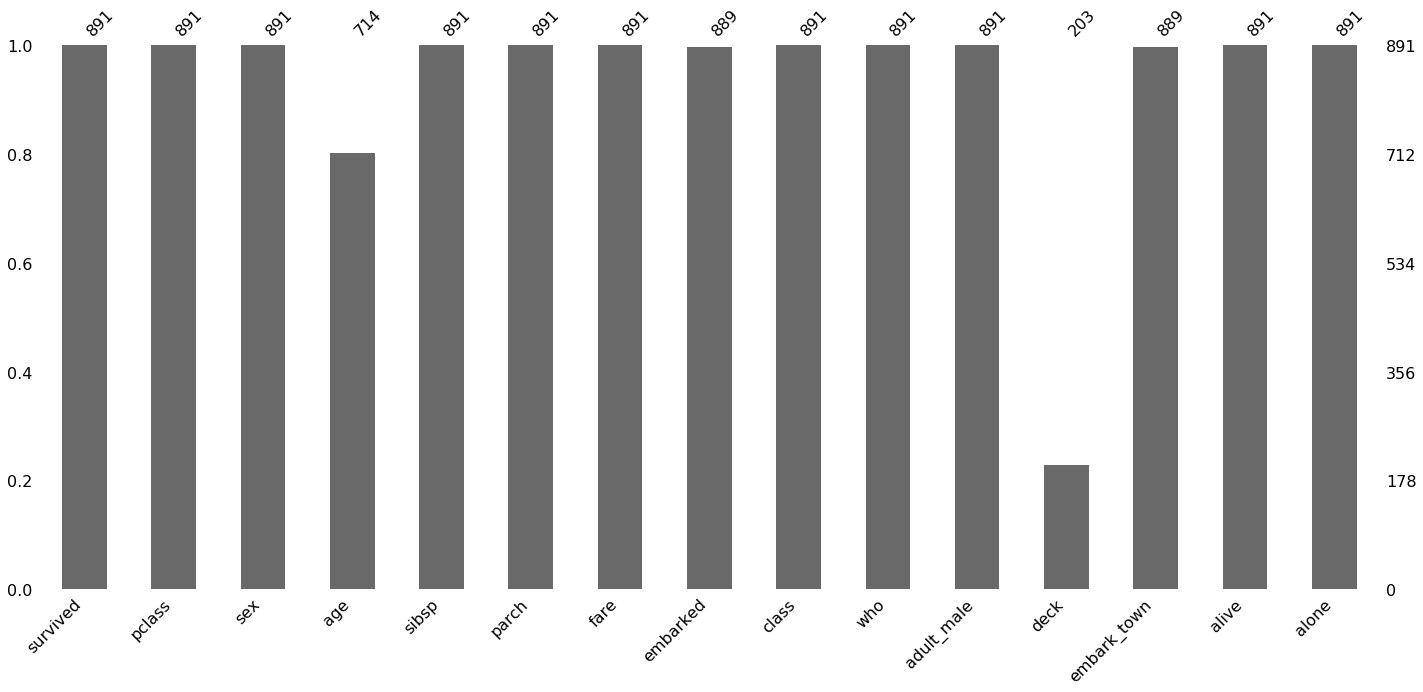

In [11]:
msno.bar(titanic)
plt.show()

## 결측된 데이터를 처리하는 방법
- 결측된 데이터가 너무 많은 경우 해당 데이터의 열 전체를 삭제
- 결측된 데이터가 일부인 경우 가장 그럴듯한 값으로 대체

In [12]:
# dropna()
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [13]:
df.dropna()

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
4,5.0,0.5,5.0,2019-01-05,B
7,8.0,0.8,8.0,2019-01-08,B


In [14]:
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


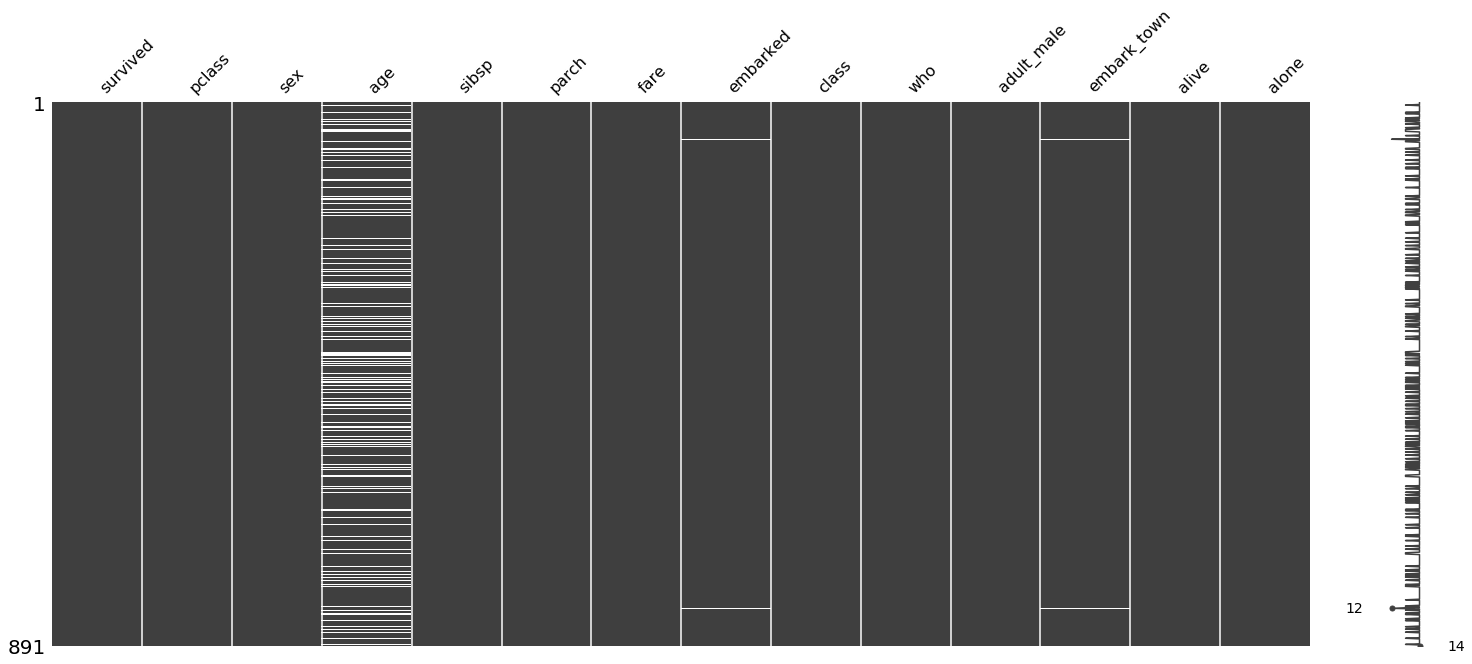

In [15]:
# deck 열을 삭제
titanic.dropna(thresh=int(len(titanic) * 0.5), axis=1, inplace=True)
msno.matrix(titanic)
plt.show()

In [16]:
# 결측 데이터를 대체하는 방법
# sklearn - Simpleimputer(평균, 중앙, 최빈)
# fit transform 대체값이 채워진 데이터 프레임을 생성할 수 있다.

In [17]:
# conda update --force conda

from sklearn.impute import SimpleImputer

In [18]:
# mean, median, most_frequent
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,x1,x2,x3,x4,x5
0,1,0.1,1,2019-01-01,A
1,2,0.1,1,2019-01-02,B
2,3,0.1,3,2019-01-03,C
3,1,0.4,4,2019-01-04,A
4,5,0.5,5,2019-01-05,B
5,1,0.1,1,2019-01-06,C
6,7,0.7,7,2019-01-01,A
7,8,0.8,8,2019-01-08,B
8,9,0.9,1,2019-01-09,C


In [19]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


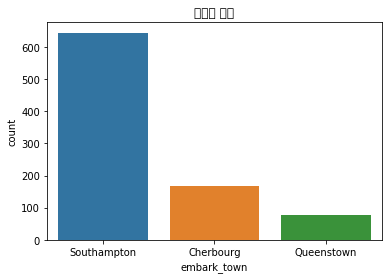

In [20]:
sns.countplot(titanic.embark_town)
plt.title('데이터 분포')
plt.show()

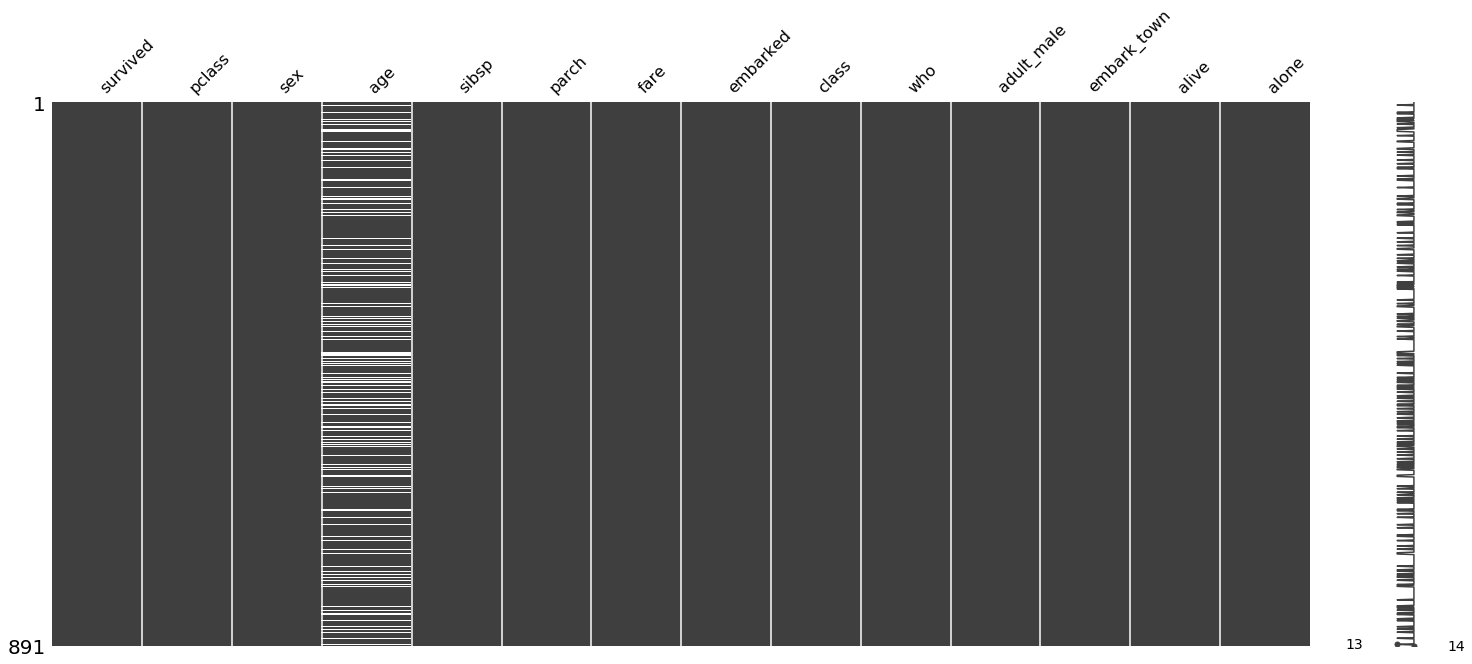

In [22]:
# mean, median, most_frequent
# 범주형 칼럼의 결측치를 최빈 범주 값으로 대체한다.
titanic_embark_town_imputer = SimpleImputer(strategy='most_frequent')
titanic['embark_town'] = titanic_embark_town_imputer.fit_transform(titanic[['embark_town']])
titanic['embarked'] = titanic_embark_town_imputer.fit_transform(titanic[['embarked']])

# 결측치 시각화
msno.matrix(titanic)
plt.show()

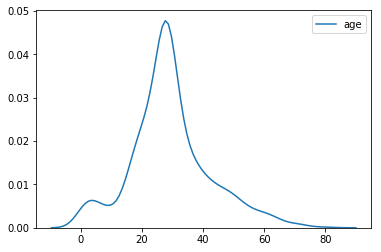

In [73]:
# 확인 결과 age 열만 결측값을 가지고 있고
# 수치형일 경우 데이터 분포 확인하고 어떻게 대체할 것인지를 고민
sns.kdeplot(titanic.age)
plt.show()

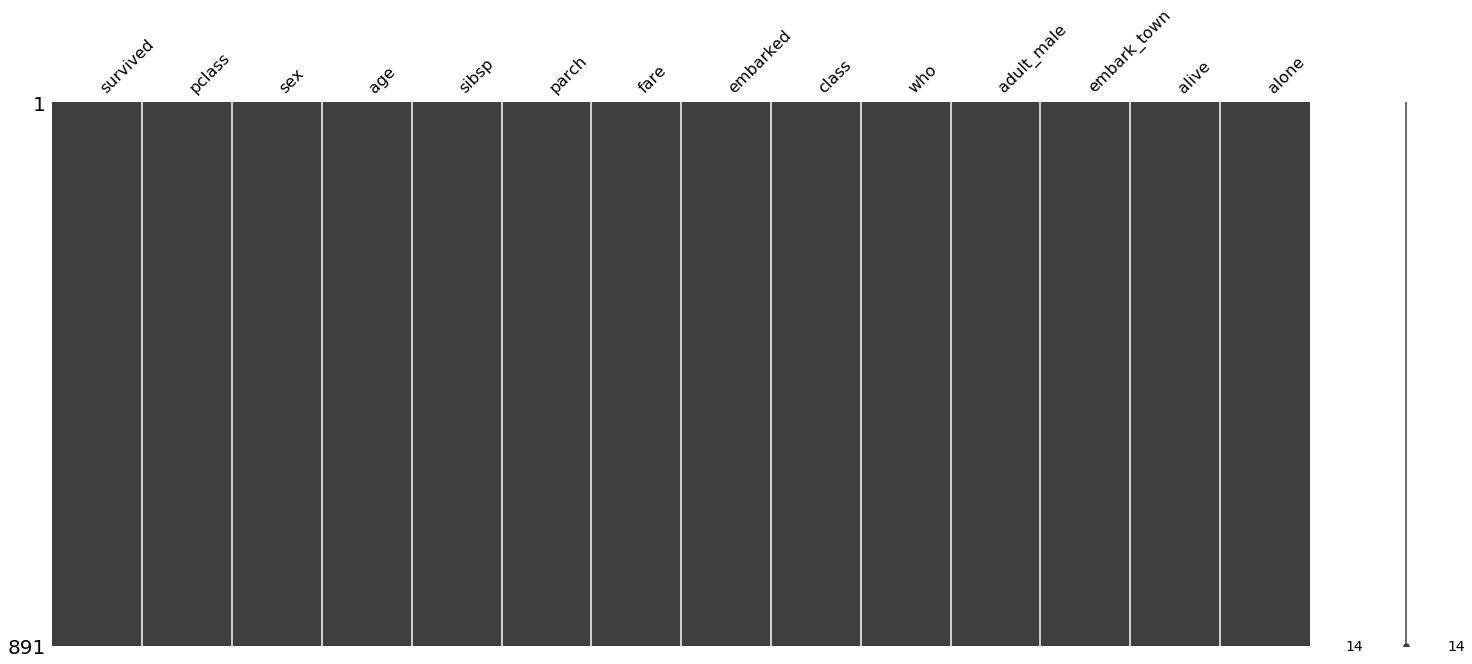

In [26]:
# age 중앙값으로 대체
titanic_age_imputer = SimpleImputer(strategy='median')
titanic['age'] = titanic_age_imputer.fit_transform(titanic[['age']])

msno.matrix(titanic)
plt.show()

# Feature Scaling
>## Normalization(정규화)
- 모든 feature가 0과 1 사이의 값으로 변환 (음수가 있으면 1)
- MinmaxScaler
- 데이터의 최솟값, 최댓값 알 경우 사용한다.
- 공식 : (X-X의 최솟값)/(X의 최댓값-X의 최솟값)

In [27]:
df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],'B':[103.02,107.26,110.35,114.23,114.68], 'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [28]:
df['A']

0    14.00
1    90.20
2    90.95
3    96.27
4    91.21
Name: A, dtype: float64

In [29]:
(df['A'] - df['A'].min()) / (df['A'].max() - df['A'].min())

0    0.000000
1    0.926219
2    0.935335
3    1.000000
4    0.938495
Name: A, dtype: float64

>### Standardization(표준화)
- 변수의 범위를 정규분포(평균 0, 편차 1) 변환
- 데이터의 최소, 최댓값을 모를 경우 사용하면 된다.
- 공식 : (X-X평균값) / (X 표준편차)

In [30]:
df['B'].mean(), df['B'].std()

(109.90799999999999, 4.901619120249964)

In [34]:
def feature_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df

In [52]:
df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],'B':[103.02,107.26,110.35,114.23,114.68], 'C':['big','small','big','small','small']})
df


,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [53]:
scaling_df = feature_scaling(df, scaling_strategy='z-score', column=['A','B'])
scaling_df

,A,B,C
0,-1.784641,-1.405250,big
1,0.390289,-0.540230,small
2,0.411695,0.090174,big
3,0.563541,0.881749,small
4,0.419116,0.973556,small


### 주의사항

In [54]:
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )
df.head(10)

,0,1,2
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
5,1,14.20,1.76
6,1,14.39,1.87
7,1,14.06,2.15
8,1,14.83,1.64
9,1,13.86,1.35


In [55]:
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head(10)

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
5,1,14.20,1.76
6,1,14.39,1.87
7,1,14.06,2.15
8,1,14.83,1.64
9,1,13.86,1.35


In [57]:
alcohol_df = feature_scaling(df, scaling_strategy='z-score', column=['Alcohol','Malic acid'])
alcohol_df.head(10)

,Class label,Alcohol,Malic acid
0,1,1.514341,-0.560668
1,1,0.245597,-0.498009
2,1,0.196325,0.021172
3,1,1.686791,-0.345835
4,1,0.294868,0.227053
5,1,1.477387,-0.515911
6,1,1.711427,-0.417446
7,1,1.304936,-0.166807
8,1,2.253415,-0.623328
9,1,1.058578,-0.882918


# Sklearn feature scaling
- fit(규칙 생성), transform(규칙 적용)
- fit_transform() : 생성과 적용을 한 번에


- StandardScaler
- MinMaxScaler

In [60]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
df_std = std_scaler.fit(df[['Alcohol', 'Malic acid']]).transform(df[['Alcohol', 'Malic acid']])
df_std[ : 5]

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

In [61]:
minmax_scaler = MinMaxScaler()
df_minmax = minmax_scaler.fit(df[['Alcohol', 'Malic acid']]).transform(df[['Alcohol', 'Malic acid']])
df_minmax[ : 5]

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265]])

In [62]:
train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

In [63]:
train_array

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [64]:
test_array

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [67]:
scaler = MinMaxScaler()
train_scaler = scaler.fit(train_array).transform(train_array)
print('raw    data : ', np.round(train_array.reshape(-1),2))
print('scaler data : ', np.round(train_scaler.reshape(-1),2))

raw    data :  [ 0  1  2  3  4  5  6  7  8  9 10]
scaler data :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [69]:
test_scaler = scaler.fit(test_array).transform(test_array)
print('test    data : ', np.round(test_array.reshape(-1),2))
print('scaler data : ', np.round(test_scaler.reshape(-1),2))

test    data :  [0 1 2 3 4 5]
scaler data :  [0.  0.2 0.4 0.6 0.8 1. ]


# iris data를 이용한 실습

In [70]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [71]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [72]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64
